## Support lines strategy

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.dates as dates
import matplotlib.pyplot as plt
from SupportLinesStrategy import SupportLinesStrategy

In [43]:
test = pd.read_csv('./data/2018-1-1-BTCUSDT-5m.csv').take(range(3445))

In [50]:
strategy = SupportLinesStrategy(n=36, size=576)

In [51]:
for _, row in test.iterrows():
    ts = datetime.fromtimestamp(row['Open time']/1000)
    strategy.capture(ts, row['Open'], row['Close'], row['High'], row['Low'], row['Volume'], row['Number of trades'])

In [52]:
min_lines = []
max_lines = []

for l in strategy.min_lines:
    r = pd.DataFrame(data=l, columns=['ts','price'])
    r.set_index('ts', inplace=True)
    min_lines.append(r)
    
for l in strategy.max_lines:
    r = pd.DataFrame(data=l, columns=['ts','price'])
    r.set_index('ts', inplace=True)
    max_lines.append(r)

In [55]:
print(strategy.buy)
print(strategy.mins)

                        price
ts                           
2018-01-05 04:10:00  14521.00
2018-01-05 04:15:00  14549.98
2018-01-05 04:20:00  14525.00
2018-01-05 04:25:00  14582.00
2018-01-05 04:30:00  14580.00
2018-01-05 04:35:00  14585.03
2018-01-05 04:40:00  14585.00
2018-01-05 04:45:00  14617.00
2018-01-05 04:50:00  14601.00
2018-01-05 04:55:00  14648.89
2018-01-05 05:00:00  14694.12
2018-01-05 05:05:00  14810.00
2018-01-05 05:10:00  14819.84
2018-01-05 05:15:00  14817.99
2018-01-05 20:00:00  15800.00
2018-01-05 20:05:00  15758.95
2018-01-05 20:10:00  15726.00
2018-01-05 20:15:00  16025.04
2018-01-05 20:20:00  15926.89
2018-01-05 20:25:00  15851.00
2018-01-05 20:30:00  15883.26
2018-01-05 20:35:00  16050.00
2018-01-05 20:40:00  15985.00
2018-01-05 20:45:00  15932.09
2018-01-05 20:50:00  15948.97
2018-01-05 22:35:00  16128.00
2018-01-05 22:40:00  16119.91
2018-01-05 22:45:00  16120.00
2018-01-05 22:50:00  16055.00
2018-01-05 22:55:00  16090.69
...                       ...
2018-01-11

Text(0.5, 0, 'Intervals')

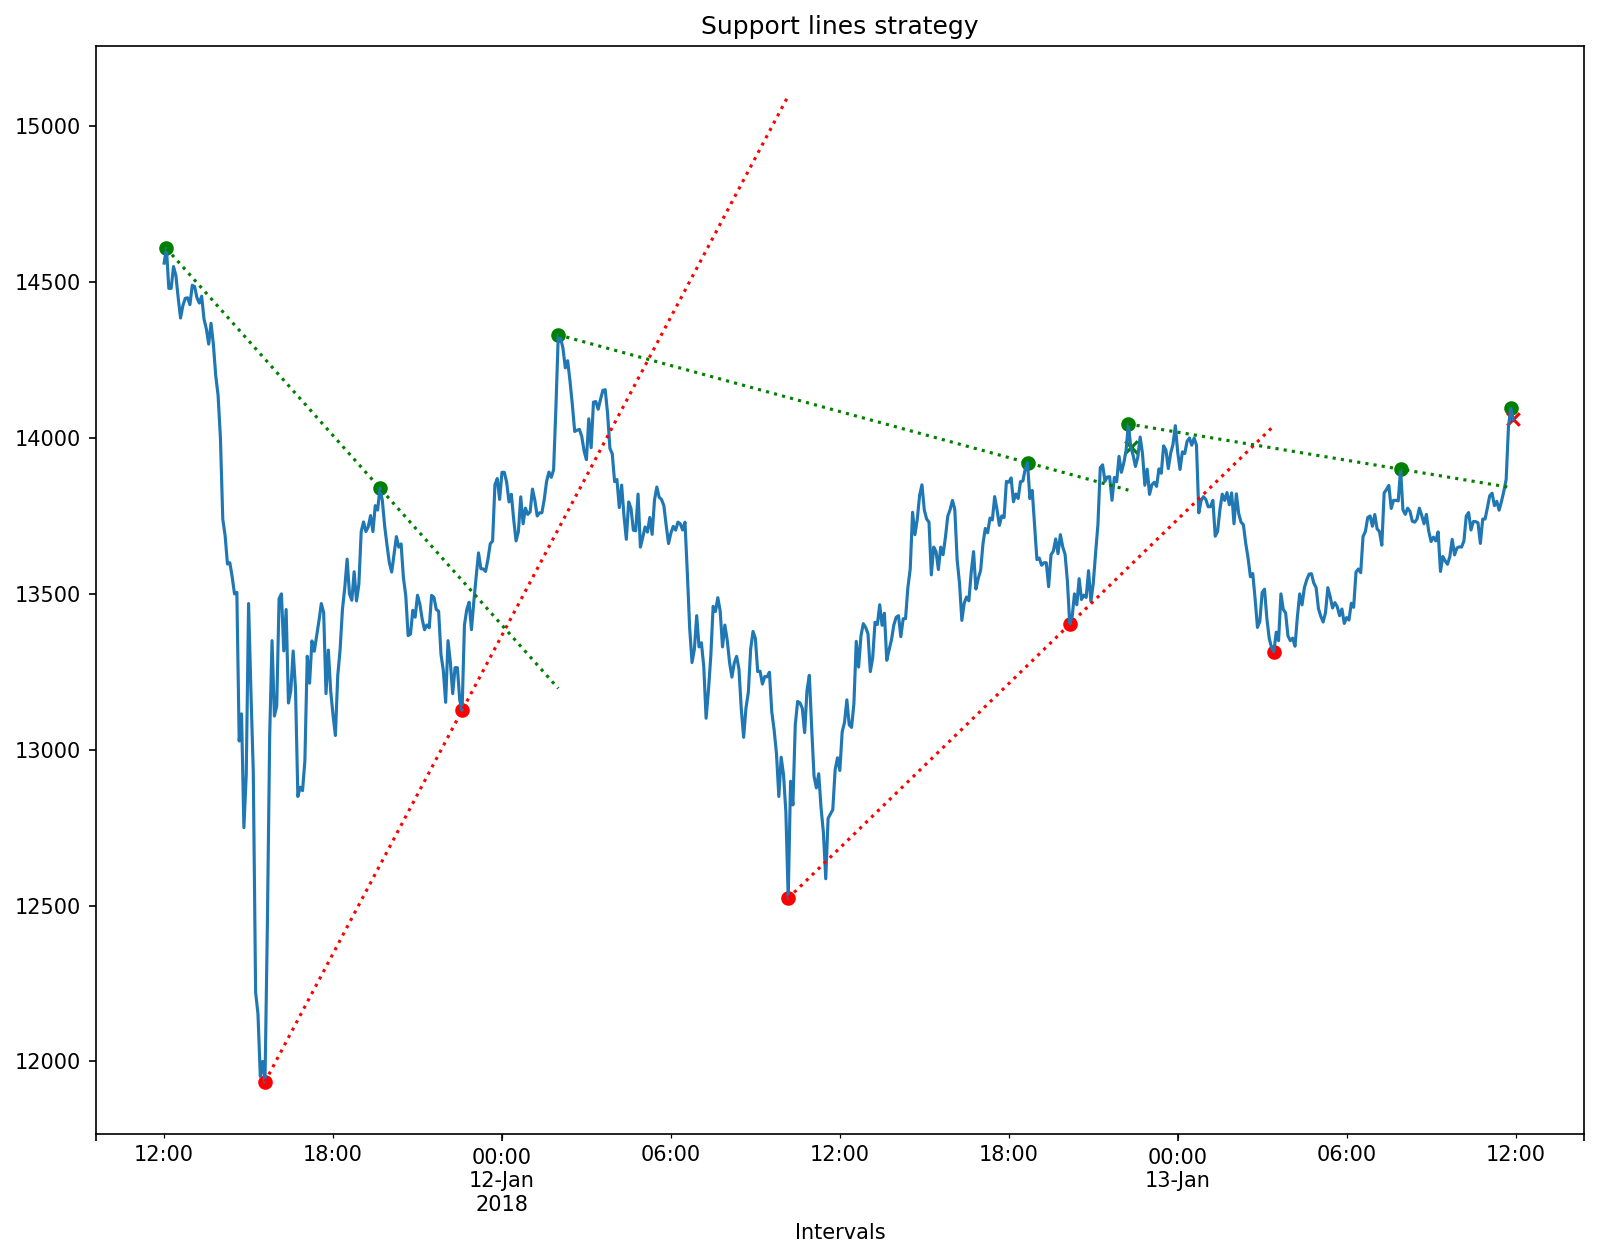

In [54]:
plt.figure(figsize=(12.8, 9.6), dpi=150)

strategy.df["close"].plot()
plt.scatter(strategy.df.index, strategy.df['min'], c='r')
plt.scatter(strategy.df.index, strategy.df['max'], c='g')
plt.scatter(strategy.buy.index[-1], strategy.buy['price'][-1], c='g', marker='x')
plt.scatter(strategy.sell.index[-1], strategy.sell['price'][-1], c='r', marker='x')
for sl in min_lines: sl['price'].plot(c='r',linestyle=':')
for sl in max_lines: sl['price'].plot(c='g',linestyle=':')
plt.title("Support lines strategy")
plt.xlabel("Intervals")